C:\Users\asus\AppData\Local\Temp\ipykernel_26824\742728194.py:21: RuntimeWarning: overflow encountered in exp
  term2 = (-1 + np.exp(((-a * 27) / 511.5 + 1 / 149.2) * x)) / (511.5 - a * 27 * 149.2)
C:\Users\asus\AppData\Local\Temp\ipykernel_26824\742728194.py:23: RuntimeWarning: invalid value encountered in multiply
  return 1000 * a * 27 * 511.5 * term1 * (term2 + term3)
c:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\asus\AppData\Local\Temp\ipykernel_26824\742728194.py:20: RuntimeWarning: overflow encountered in exp
  term1 = np.exp((a * 27**2) / 511.5 - x / 149.2)
C:\Users\asus\AppData\Local\Temp\ipykernel_26824\742728194.py:22: RuntimeWarning: overflow encountered in exp
  term3 = (-1 + np.exp((-1 / 27 - (a * 27) / 511.5 + 1 / 149.2) * x)) / (-511.5 + a * 27 

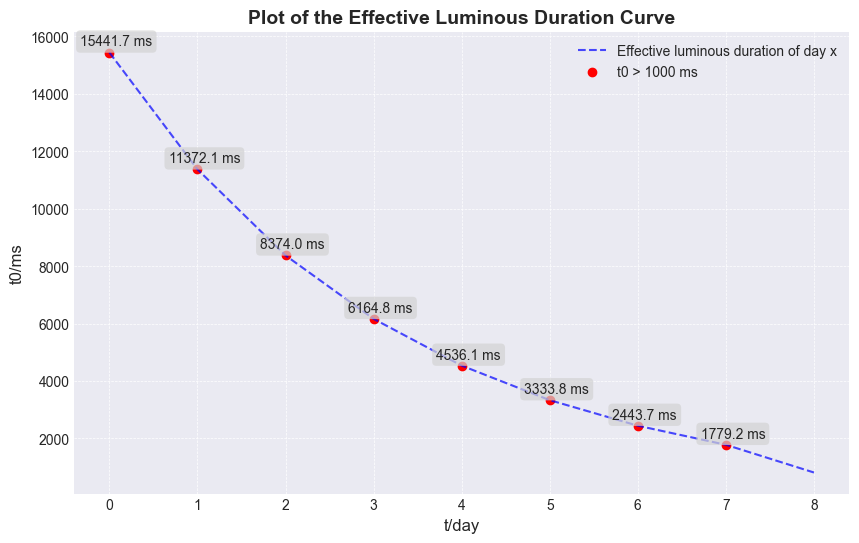

In [244]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.optimize import fsolve  

# Constants  
t_1 = 1.2456  # average lifespan of normal active bacteria (day)  
C12 = 0.0130  
C1 = 500  
a = 0.0804  # Rate of stress change
I0 = 371  # normal luminous intensity threshold  

def normal_decay(x):  
    return C1 * np.exp(-(1/t_1 + C12) * x)  

def sol_t0_1_2(y):  
    approx1 = 3.106852289 * np.exp(0.568912246 * y)  
    approx2 = 15443.29 * np.exp(-0.305803114 * y)  

    def I(x):  
        term1 = np.exp((a * 27**2) / 511.5 - x / 149.2)  
        term2 = (-1 + np.exp(((-a * 27) / 511.5 + 1 / 149.2) * x)) / (511.5 - a * 27 * 149.2)  
        term3 = (-1 + np.exp((-1 / 27 - (a * 27) / 511.5 + 1 / 149.2) * x)) / (-511.5 + a * 27 * 149.2 + (511.5 * 149.2) / 27)  
        return 1000 * a * 27 * 511.5 * term1 * (term2 + term3)  

    sol1 = fsolve(lambda x: I(x) * normal_decay(y) - I0, approx1)[0]  
    sol2 = fsolve(lambda x: I(x) * normal_decay(y) - I0, approx2)[0]  

    sol1 = sol1 if sol1 > 0 else 0  
    sol2 = sol2 if sol2 > 0 else 0  

    return sol1, sol2  

def solve_t0(y_values):  
    results = []  
    for y in y_values:  
        sol1, sol2 = sol_t0_1_2(y)  
        results.append(sol2 - sol1)  
    return np.array(results)  

# Generate x values  
x_values = np.arange(9)  

# Calculate y values  
y_values = solve_t0(x_values)  

# Filter x_values and y_values for t0 > 1000  
filtered_x_values = x_values[y_values > 1000]  
filtered_y_values = y_values[y_values > 1000]  

# Apply plot styling  
plt.style.use('seaborn-darkgrid')  
plt.figure(figsize=(10, 6))  
plt.plot(x_values, y_values, label='Effective luminous duration of day x', linestyle='--', alpha=0.7, color='blue')  
plt.scatter(filtered_x_values, filtered_y_values, color='red', label='t0 > 1000 ms')  

# Annotate the y values for points where t0 > 1000  
for x, y in zip(filtered_x_values, filtered_y_values):  
    plt.annotate(f'{y:.1f} ms', (x, y),  textcoords="offset points", xytext=(5,5), ha='center',  
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='lightgray', alpha=0.7))  

plt.title('Plot of the Effective Luminous Duration Curve', fontsize=14, weight='bold')  
plt.xlabel('t/day', fontsize=12)  
plt.ylabel('t0/ms', fontsize=12)  
plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend()  
plt.show()




C:\Users\asus\AppData\Local\Temp\ipykernel_26824\711068692.py:55: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
c:\Users\asus\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\asus\AppData\Local\Temp\ipykernel_26824\711068692.py:20: RuntimeWarning: overflow encountered in exp
  term2 = (-1 + np.exp(((-a * 27) / 511.5 + 1 / 149.2) * x)) / (511.5 - a * 27 * 149.2)
C:\Users\asus\AppData\Local\Temp\ipykernel_26824\711068692.py:22: RuntimeWarning: invalid value encountered in multiply
  return 1000 * a * 27 * 511.5 * term1

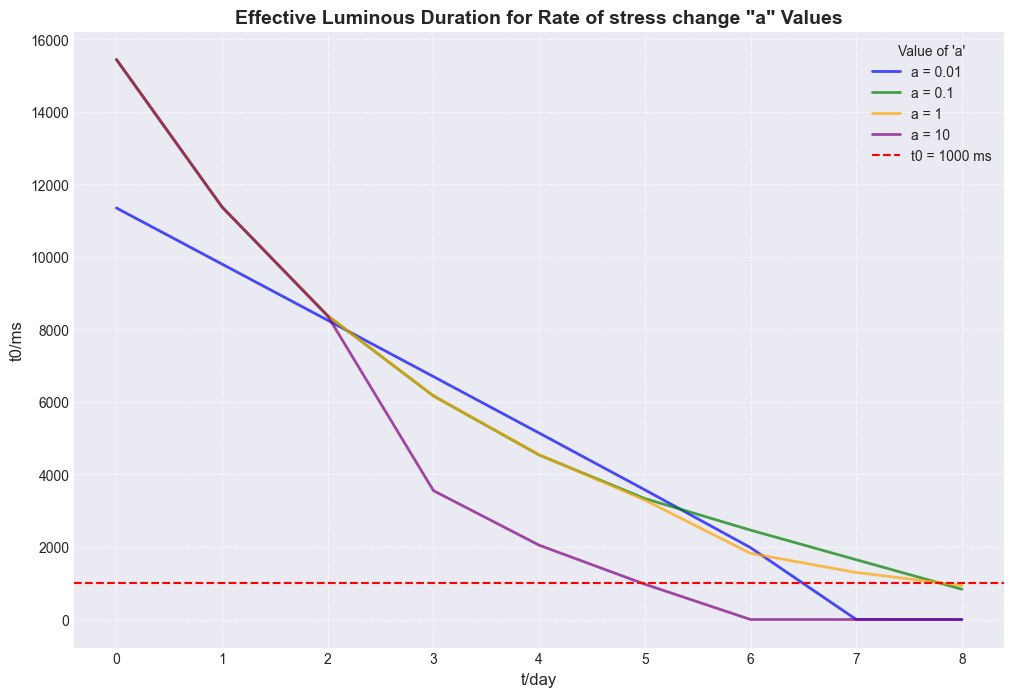

In [259]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.optimize import fsolve  

# Constants  
t_1 = 1.2456  # average lifespan of normal active bacteria (day)  
C12 = 0.0130  
C1 = 500  
I0 = 371  # normal luminous intensity threshold  

def normal_decay(x):  
    return C1 * np.exp(-(1/t_1 + C12) * x)  

def sol_t0_1_2(y, a):  
    approx1 = 3.106852289 * np.exp(0.568912246 * y)  
    approx2 = 15443.29 * np.exp(-0.305803114 * y)  

    def I(x):  
        term1 = np.exp((a * 27**2) / 511.5 - x / 149.2)  
        term2 = (-1 + np.exp(((-a * 27) / 511.5 + 1 / 149.2) * x)) / (511.5 - a * 27 * 149.2)  
        term3 = (-1 + np.exp((-1 / 27 - (a * 27) / 511.5 + 1 / 149.2) * x)) / (-511.5 + a * 27 * 149.2 + (511.5 * 149.2) / 27)  
        return 1000 * a * 27 * 511.5 * term1 * (term2 + term3)  

    sol1 = fsolve(lambda x: I(x) * normal_decay(y) - I0, approx1)[0]  
    sol2 = fsolve(lambda x: I(x) * normal_decay(y) - I0, approx2)[0]  

    sol1 = sol1 if sol1 > 0 else 0  
    sol2 = sol2 if sol2 > 0 else 0  

    return sol1, sol2  

def solve_t0(y_values, a):  
    results = []  
    zero_encountered = False  # Track if a zero value has been calculated  
    for y in y_values:  
        sol1, sol2 = sol_t0_1_2(y, a)  
        result = sol2 - sol1  
        results.append(result)  
    for i in range(len(y_values)):  
        if zero_encountered:  
            results[i] = 0  
        else:  
            if results[i] < 1000:  
                zero_encountered = True  # Mark that zero has been encountered  
    return np.array(results)  

# Generate x values  
x_values = np.arange(9)  

# List of a values with corresponding colors for the plot  
a_values = [0.01, 0.1, 1, 10]  
colors = ['blue', 'green', 'orange', 'purple']  

# Apply plot styling  
plt.style.use('seaborn-darkgrid')  
plt.figure(figsize=(12, 8))  

# Plot curves for each value of 'a'  
for a, color in zip(a_values, colors):  
    # Calculate y values  
    y_values = solve_t0(x_values, a)  
    plt.plot(x_values, y_values, label=f'a = {a}', color=color, linestyle='-', linewidth=2, alpha=0.7)  # 调整线条透明度  

# Add horizontal line at t0 = 1000 ms  
plt.axhline(y=1000, color='red', linestyle='--', linewidth=1.5, label='t0 = 1000 ms')  

plt.title('Effective Luminous Duration for Rate of stress change "a" Values', fontsize=14, weight='bold')  
plt.xlabel('t/day', fontsize=12)  
plt.ylabel('t0/ms', fontsize=12)  
plt.grid(visible=True, linestyle='--', linewidth=0.5)  
plt.legend(title="Value of 'a'")  
plt.show()

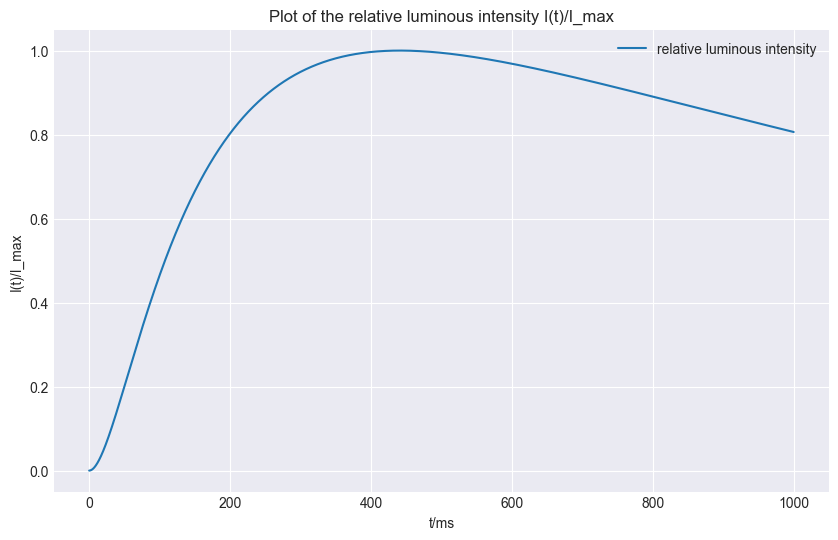

the moment when the luminous intensity reaches the maximum value is 441.1244 ms


In [260]:
import numpy as np  
import matplotlib.pyplot as plt  

# Define the function  
a = 0.01
def y(x):  
    term1 = np.exp((a * 27**2) / 511.5 - x / 149.2)  
    term2 = (-1 + np.exp(((-a * 27) / 511.5 + 1 / 149.2) * x)) / (511.5 - a * 27 * 149.2)  
    term3 = (-1 + np.exp((-1 / 27 - (a * 27) / 511.5 + 1 / 149.2) * x)) / (-511.5 + a * 27 * 149.2 + (511.5 * 149.2) / 27)  
    return 1000*a*27*511.5*term1 * (term2 + term3)

# Generate x values  
x_values = np.linspace(0, 1000, 100000)  

# Calculate y values  
# y_values = y(x_values) 
y_values = y(x_values) / max(y(x_values)) 

# Plot the function  
plt.figure(figsize=(10, 6))  
plt.plot(x_values, y_values, label='relative luminous intensity')  
plt.title('Plot of the relative luminous intensity I(t)/I_max')  
plt.xlabel('t/ms')  
plt.ylabel('I(t)/I_max')  
plt.grid(True)  
plt.legend()  
plt.show()


for i in range(len(y_values)):
    if y_values[i] == 1:
        print(f"the moment when the luminous intensity reaches the maximum value is {round(x_values[i],4)} ms")
        break


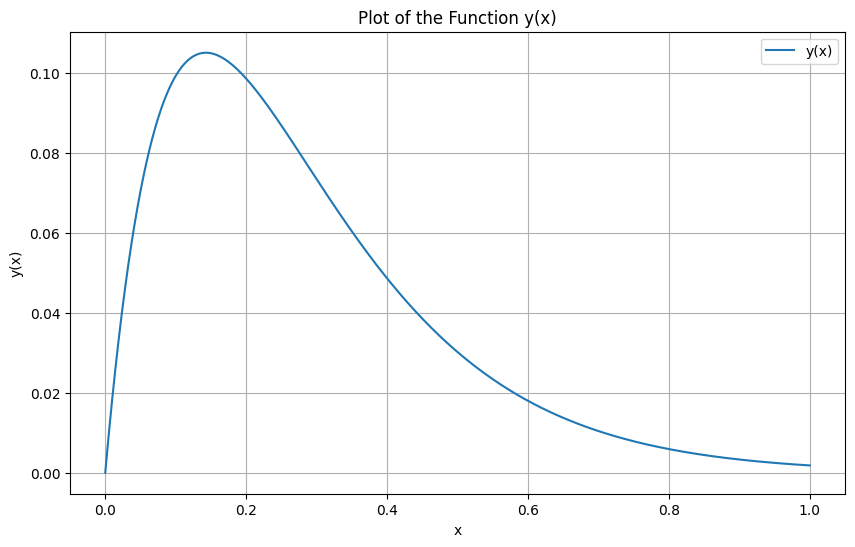

0.10510841171597045


In [144]:
import numpy as np  
import matplotlib.pyplot as plt  

# Define the function  
a = 1
def y(x):  
    term1 = np.exp(-5*x)  
    term2 = 2*x*np.exp(-2*x) 
    term3 = np.cos(30 * x) 
    return  term1*(term2)

# Generate x values  
x_values = np.linspace(0, 1, 100000)  

# Calculate y values  
y_values = y(x_values) 

# Plot the function  
plt.figure(figsize=(10, 6))  
plt.plot(x_values, y_values, label='y(x)')  
plt.title('Plot of the Function y(x)')  
plt.xlabel('x')  
plt.ylabel('y(x)')  
plt.grid(True)  
plt.legend()  
plt.show()

print(max(y_values))

Point: x = 0.0150, delta_r(x) = -0.0013
Point: x = 0.0175, delta_r(x) = -0.0012
Point: x = 0.0200, delta_r(x) = -0.0012
Point: x = 0.0225, delta_r(x) = -0.0012
Point: x = 0.0250, delta_r(x) = -0.0012


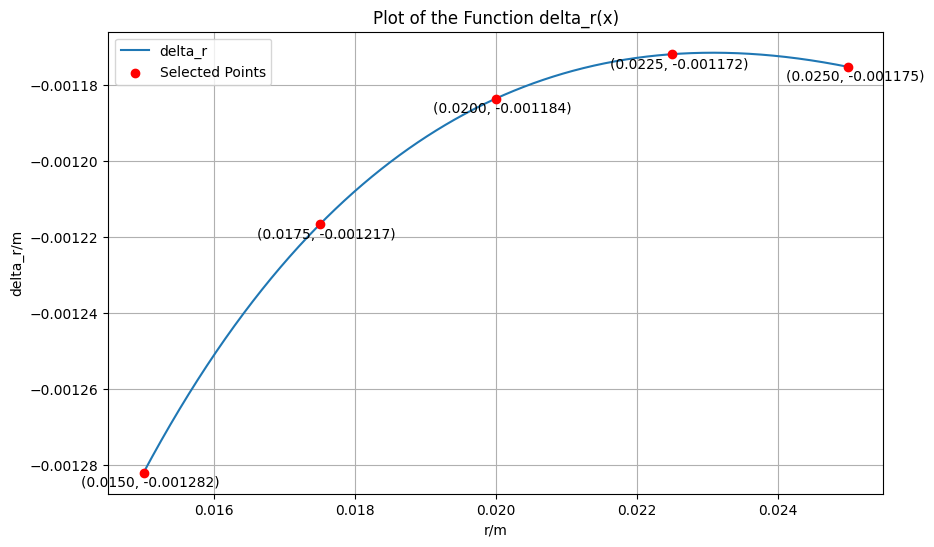

In [116]:
import numpy as np  
import matplotlib.pyplot as plt  

# Constants  
P_b = 1000  
miu = 13000  
lamda = 56333  
a = 0.015  
b = 0.025  

# Define the function  
def delta_r(x):  
    term1 = - x*P_b/(2*miu)*(lamda+2*miu)/((3*lamda+2*miu)*(1-a**2/b**2))  
    # If term2 is needed, it should also operate on x:  
    term2 = -P_b/(2*miu)*a**2/((1-a**2/b**2)*x)  
    return (term1+term2) * np.ones_like(x)  # Return an array of the same shape as x  

# Generate x values  
x_values = np.linspace(0.015, 0.025, 1000)  

# Calculate y values for the plot  
y_values = delta_r(x_values)  

# Select five equidistant points within the 0.015 to 0.025 range  
selected_x_values = np.linspace(0.015, 0.025, 5)  
selected_y_values = delta_r(selected_x_values)  

# Print the coordinates of the five points  
for x, y in zip(selected_x_values, selected_y_values):  
    print(f"Point: x = {x:.4f}, delta_r(x) = {y:.4f}")  

# Plot the function  
plt.figure(figsize=(10, 6))  
plt.plot(x_values, y_values, label='delta_r')  

# Plot the selected five points  
plt.scatter(selected_x_values, selected_y_values, color='red', zorder=5, label='Selected Points')  

# Annotate the selected points with their coordinates  
for x, y in zip(selected_x_values, selected_y_values):  
    plt.annotate(f"({x:.4f}, {y:.6f})", (x, y), textcoords="offset points", xytext=(5, -10), ha='center')  

plt.title('Plot of the Function delta_r(x)')  
plt.xlabel('r/m')  
plt.ylabel('delta_r/m')  
plt.grid(True)  
plt.legend()  
plt.show()

In [113]:
P_b*lamda/(miu*(3*lamda+2*miu)*(1-a**2/b**2))

0.003472219482782357

Point: x = 0.0150, sigma_r(x) = 0.0625
Point: x = 0.0175, sigma_r(x) = 0.0338
Point: x = 0.0200, sigma_r(x) = 0.0152
Point: x = 0.0225, sigma_r(x) = 0.0024
Point: x = 0.0250, sigma_r(x) = -0.0067


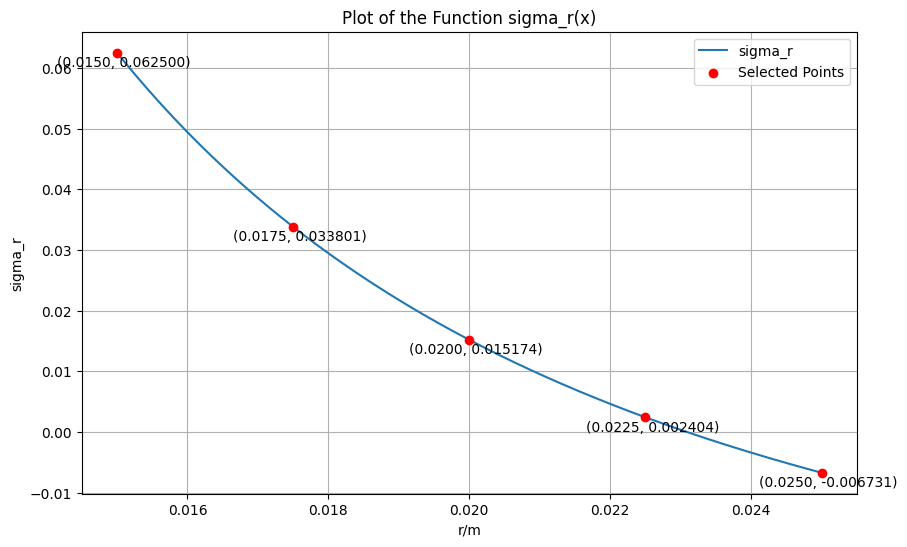

In [141]:
import numpy as np  
import matplotlib.pyplot as plt  

# Constants  
P_b = 1800  
miu = 13000  
lamda = 56333  
a = 0.015  
b = 0.025  

# Define the function  
def sigma_r(x):  
    term1 = - P_b/(2*miu)*(lamda+2*miu)/((3*lamda+2*miu)*(1-a**2/b**2))  
    # If term2 is needed, it should also operate on x:  
    term2 = P_b/(2*miu)*a**2/((1-a**2/b**2)*x**2)  
    return (term1+term2) * np.ones_like(x)  # Return an array of the same shape as x  

# Generate x values  
x_values = np.linspace(0.015, 0.025, 1000)  

# Calculate y values for the plot  
y_values = sigma_r(x_values)  

# Select five equidistant points within the 0.015 to 0.025 range  
selected_x_values = np.linspace(0.015, 0.025, 5)  
selected_y_values = sigma_r(selected_x_values)  

# Print the coordinates of the five points  
for x, y in zip(selected_x_values, selected_y_values):  
    print(f"Point: x = {x:.4f}, sigma_r(x) = {y:.4f}")  

# Plot the function  
plt.figure(figsize=(10, 6))  
plt.plot(x_values, y_values, label='sigma_r')  

# Plot the selected five points  
plt.scatter(selected_x_values, selected_y_values, color='red', zorder=5, label='Selected Points')  

# Annotate the selected points with their coordinates  
for x, y in zip(selected_x_values, selected_y_values):  
    plt.annotate(f"({x:.4f}, {y:.6f})", (x, y), textcoords="offset points", xytext=(5, -10), ha='center')  

plt.title('Plot of the Function sigma_r(x)')  
plt.xlabel('r/m')  
plt.ylabel('sigma_r')  
plt.grid(True)  
plt.legend()  
plt.show()

In [142]:
2*P_b/((3*lamda+2*miu)*(1-a**2/b**2))

0.028846301775906535